

3.97
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02


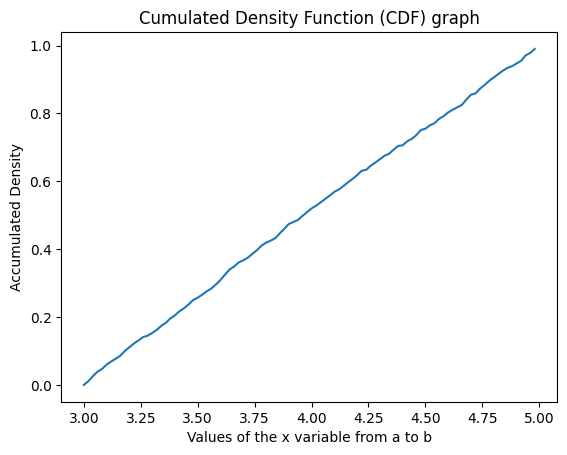

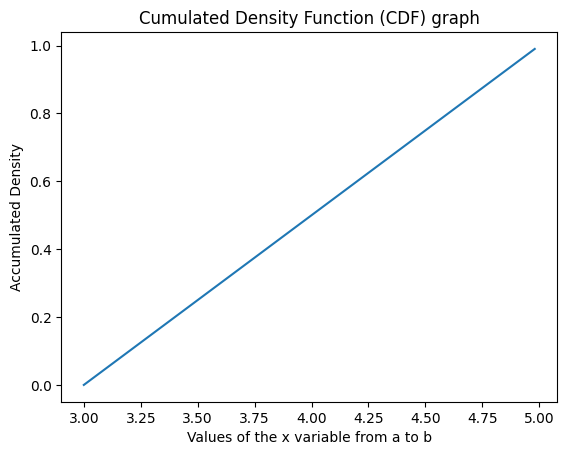

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

#EXERCISE NUMBER 1
#a)

#The probability distribution function is f(x) = 1 / (b-a)
#The cumulative distribution function is F(x) = (x-a)/(b-a)

#b) 

b = 5 #set the values for a and b
a = 3

U = np.random.uniform()

def get_x(u):
    global b, a
    value = u * (b-a) + a 
    return value

resp = round(get_x(U),2)
print("\n")
print(resp)

#c) 

names = ["one", "two", "three"]
step = 0 #initialize variable
chunks = 0

def plot(array_x, array_y):
    plt.ylabel("Accumulated Density")
    plt.xlabel("Values of the x variable from a to b")
    plt.title("Cumulated Density Function (CDF) graph")
    plt.plot(array_x, array_y)
    plt.show() 

def merge(left, right):
    # If the first array is empty, then nothing needs
    # to be merged, and you can return the second array as the result
    if len(left) == 0:
        return right

    # If the second array is empty, then nothing needs
    # to be merged, and you can return the first array as the result
    if len(right) == 0:
        return left

    result = []
    index_left = index_right = 0

    # Now go through both arrays until all the elements
    # make it into the resultant array
    while len(result) < len(left) + len(right):
        # The elements need to be sorted to add them to the
        # resultant array, so you need to decide whether to get
        # the next element from the first or the second array
        if left[index_left] <= right[index_right]:
            result.append(left[index_left])
            index_left += 1
        else:
            result.append(right[index_right])
            index_right += 1

        # If you reach the end of either array, then you can
        # add the remaining elements from the other array to
        # the result and break the loop
        if index_right == len(right):
            result += left[index_left:]
            break

        if index_left == len(left):
            result += right[index_right:]
            break

    return result

def merge_sort(array):
    # If the input array contains fewer than two elements,
    # then return it as the result of the function
    if len(array) < 2:
        return array

    midpoint = len(array) // 2

    # Sort the array by recursively splitting the input
    # into two equal halves, sorting each half and merging them
    # together into the final result
    return merge(
        left=merge_sort(array[:midpoint]),
        right=merge_sort(array[midpoint:]))    

def get_CDF_array(array):
    #WE HAVE TO CHOOSE A SORTING ALGORITHM THAT SORTS THE ARRAY MINIMIZING THE COMPLEXITY
    #Merge-sort algorithm for example, with n*log(n) complexity
    global a,b, step, chunks
    chunks = 100
    CDF = []
    length = len(array)
    step = (b-a) / chunks
    for i in range(chunks):
        acc = 0
        pivot = a + (b-a) * i/chunks
        for j in range(length):
            if(array[j] <= pivot):
                acc += 1
        CDF.append(acc/length)
    return CDF


class numbers():
    one = []
    two = []
    three = []

class results_x():
    one = []
    two = []
    three = []  
    one_CDF = [] 
    two_CDF = []
    three_CDF = [] 

seq = 3 #set up the variables with the given data by the statement of the exercise
iter = 1000

#generating the random numbers, "seq = 3" arrays of "iter = 1000" length
for i in range(iter):
    numbers.one.append(np.random.uniform())
for i in range(iter):
    numbers.two.append(np.random.uniform())
for i in range(iter):
    numbers.three.append(np.random.uniform())    

#getting the x value between a and b for each generated random value
for i in range(len(numbers.one)):
    results_x.one.append(get_x(numbers.one[i]))
for i in range(len(numbers.two)):
    results_x.two.append(get_x(numbers.two[i]))
for i in range(len(numbers.three)):
    results_x.three.append(get_x(numbers.three[i]))   


results_x.one_CDF = get_CDF_array(results_x.one)
results_x.two_CDF = get_CDF_array(results_x.two)
results_x.three_CDF = get_CDF_array(results_x.three)

#creating an array for being used in the x-axis of the plots
# whose step size will be = "step" 
x_array = []
for h in range(chunks):
    x_array.append(a + h*step)


#d) 

#generate an array with the discrete values of the F(x) = (x-a)/(b-a) function that we obtained in the a) section
F = []
for o in range(chunks):
    x = a + (b-a) * o/chunks
    F.append((x-a)/(b-a))

#plotting both CDFs, the empirical one and theoretical one

plot(x_array, results_x.one_CDF)
plot(x_array, F)

